# Online data

In [2]:
url = 'https://github.com/Abdelhadi13121/Data-science-Methodology/raw/refs/heads/main/onlineshop.xlsx'

In [3]:
import pandas as pd

In [4]:
online = pd.read_excel(url)

In [5]:
online.head()

,DATE,USER_ID,AGE,GENDER,TYPE,CREDIT_SCORE,LIFETIME,PAYMENT_METHOD,TURNOVER,SENDBACK,VIDEO_AD,CONVERTED
0,2023-10-02,cardiB,27,female,NaN,3,8,bank transfer,44,False,False,0
1,2023-10-02,natalie_hershlag,42,female,NaN,4,10,BNPL,34,False,False,0
2,2023-10-02,babe_ruth,48,male,1.0,2,12,BNPL,34,False,False,0
3,2023-10-02,homlesspistachio,60,male,1.0,5,9,paypal,500,False,False,0
4,2023-10-02,chrstian_hauff,93,male,1.0,5,12,credit card,43,False,True,0


In [17]:
from scipy.stats import shapiro, ttest_ind, ttest_rel,ttest_1samp

In [15]:
len(online)

463

In [10]:
shapiro(online['TURNOVER'])

ShapiroResult(statistic=np.float64(0.7577921923808482), pvalue=np.float64(1.60791662287639e-25))

In [19]:
ttest_1samp(online['TURNOVER'], popmean=50)

TtestResult(statistic=np.float64(14.753524792721816), pvalue=np.float64(1.2207430000583607e-40), df=np.int64(462))

In [20]:
ttest_1samp(online['TURNOVER'], popmean=50, alternative='greater')

TtestResult(statistic=np.float64(14.753524792721816), pvalue=np.float64(6.103715000291804e-41), df=np.int64(462))

In [21]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of TURNOVER')

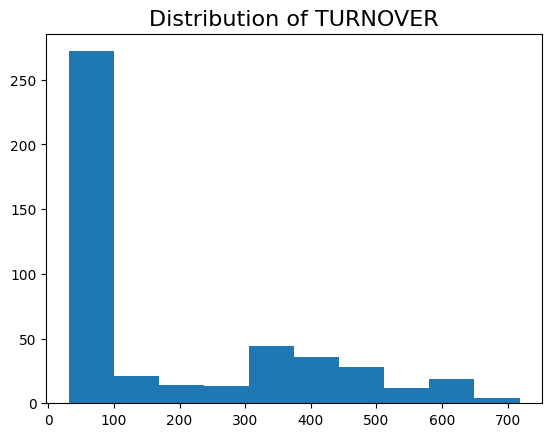

In [25]:
plt.hist(online['TURNOVER'])
plt.title('Distribution of TURNOVER', fontsize = 16)

# Olive data

In [27]:
olive = pd.read_csv('https://raw.githubusercontent.com/Abdelhadi13121/Data-science-Methodology/refs/heads/main/olive_oil.csv')

In [29]:
olive.isna().sum()

DAY               1
MONTH             1
PRODUCER          1
OLIVE_OIL_TYPE    1
SHIFT             1
ACIDITY_LEVEL     1
OLIVE_VARIETY     1
QUALITY_SCORE     1
dtype: int64

In [39]:
olive.notna().sum()

DAY               20
MONTH             20
PRODUCER          20
OLIVE_OIL_TYPE    20
SHIFT             20
ACIDITY_LEVEL     20
OLIVE_VARIETY     20
QUALITY_SCORE     20
dtype: int64

**`Solution :`**

**Task 1: Hypothesis Testing Basics**

**Scenario A:**

-   **Null Hypothesis (H₀):** There is no difference in acidity levels between olives from the new supplier and the current supplier.

-   **Alternative Hypothesis (H₁):** The acidity levels of olives from the new supplier are significantly different from those of the current supplier.

**Scenario B:**

-   **Null Hypothesis (H₀):** The mean quality score of premium olive oil is equal to 800

-   **Alternative Hypothesis (H₁):** The mean quality score of premium olive oil is greater than 800


In [45]:
sum(olive['ACIDITY_LEVEL'].notna())

20

In [52]:
from scipy.stats import shapiro, ttest_1samp, ttest_ind, ttest_rel

In [55]:
clean_olive = olive.dropna()
shapiro(clean_olive['QUALITY_SCORE'])

ShapiroResult(statistic=np.float64(0.9454228782740937), pvalue=np.float64(0.30289324929914996))

(array([2., 2., 1., 1., 3., 1., 3., 2., 1., 4.]),
 array([822. , 839.7, 857.4, 875.1, 892.8, 910.5, 928.2, 945.9, 963.6,
        981.3, 999. ]),
 <BarContainer object of 10 artists>)

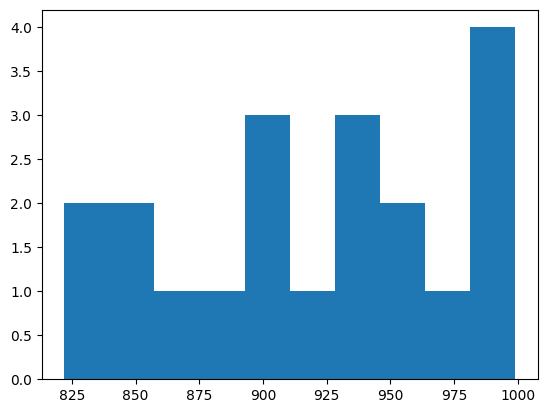

In [56]:
plt.hist(clean_olive['QUALITY_SCORE'])

In [58]:
ttest_1samp(clean_olive['QUALITY_SCORE'], popmean=800, alternative='greater')

TtestResult(statistic=np.float64(9.342212868465122), pvalue=np.float64(7.783549997457483e-09), df=np.int64(19))

-   There is strong evidence that the true mean of `QUALITY_SCORE` is greater than 800.

**Task 4: Exploring Other Types of t-Tests**

4.  Understand the differences between t-test types:

**Two-Sample t-Test:** Compare the acidity levels of olives from two suppliers (e.g., `Supplier A` and `Supplier B`). Use: 

In [67]:
olive['ACIDITY_LEVEL_B'] = [0.25, 0.29, 0.22, 0.22, 0.32, 0.28, 0.29, 0.29, 0.39, 0.25, None, 0.34, 0.31, 0.28, 0.29, 0.30, 0.34, 0.30, 0.30, 0.29, 0.26]

In [64]:
olive.head()
olive.isna().sum()

DAY                  1
MONTH                1
PRODUCER             1
OLIVE_OIL_TYPE       1
SHIFT                1
ACIDITY_LEVEL        1
OLIVE_VARIETY        1
QUALITY_SCORE        1
ACIDITY_LEVEL_B      1
QUALITY_SCORE_NEW    0
dtype: int64

In [72]:
olive1 = olive.dropna()

In [66]:
ttest_ind(olive1['ACIDITY_LEVEL'], olive1['ACIDITY_LEVEL_B'], equal_var=True)

TtestResult(statistic=np.float64(0.4779333565882858), pvalue=np.float64(0.63543564514203), df=np.float64(38.0))

**p-Value**: The p-value of 0.6354 is greater than the significance level of 0.05. Therefore, we **fail to reject the null hypothesis**.

This indicates that there is **no significant difference** in the mean acidity levels between the two groups.


**Paired t-Test: Evaluating New Pressing Method**


In [71]:
olive['QUALITY_SCORE_NEW'] = [902, 883, 945, 910, 922, 905, 940, 960, 860, 855, 995, 960, 870, 940, 1000, 982, 992, 1002, 835, 830, 890]

In [74]:
ttest_rel(olive1['QUALITY_SCORE'], olive1['QUALITY_SCORE_NEW'], alternative='greater')

TtestResult(statistic=np.float64(-0.05234302123445665), pvalue=np.float64(0.5205991063420559), df=np.int64(19))

The **p-value** is 0.52060, which is much greater than the significance level of 0.05.

-   Therefore, we **fail to reject the null hypothesis H0​. This means that there is no statistically significant evidence** to suggest that the new pressing method improves the quality score compared to the traditional method.

task 5 :

**Decision Based on the Results**

**1. For the One-Sample t-Test (Quality Score of Premium Olive Oil)**:

-   **Result**: We **reject the null hypothesis** (the mean quality score is equal to 800), as the p-value is very small.

-   **Decision**:

    -   Since the mean quality score is significantly higher than 800, the company should:

        -   **Market the premium quality**: Emphasize the high quality of the product, which is superior to the industry standard.

        -   **Consider price adjustment**: Due to the superior quality, a price increase might be justified.

        -   **Continue quality control**: Ensure that the quality remains consistently high to support the brand reputation.

**2. For the Two-Sample t-Test (Acidity Levels between Two Suppliers)**:

-   **Result**: We **fail to reject the null hypothesis** because the p-value (0.6354) is greater than 0.05.

-   **Decision**:

    -   Since there is no significant difference in acidity levels between the two suppliers, the company can:

        -   **Continue sourcing from both suppliers**: There is no strong evidence to prefer one supplier over the other based on acidity.

        -   **Investigate other factors**: Consider factors such as cost, delivery time, or reliability when choosing between suppliers.

**3. For the Paired t-Test (New Pressing Method)**:

-   **Result**: We **fail to reject the null hypothesis** (the new method does not improve the quality score), with a p-value of 0.5206.

-   **Decision**:

    -   Since there is no significant evidence that the new pressing method improves the quality score:

        -   **Stick with the traditional method**: If the goal was to improve quality, there is no justification to adopt the new method based on this data.

        -   **Reassess the new method**: Further testing could be done with more data or a different approach to evaluate the effectiveness of the new method.